In [1]:
# 관련 모듈 import
# 라이브러리 로딩
# AdaBoostClassifier, Support Vector Machine
# make lassification -> 자동 분류 데이터셋 생성
# train_test_split 샘플 분리 라이브러리 사용
# accuracy_score 확인 라이브러리 로딩
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 분류 데이터셋 생성
# 샘플갯수 1000, 특성은 20개, random_state = 42
# random_state를 지정하면 항상 같은 결과 나옴
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

# 학습용 및 테스트용 데이터 분할
# 학습용 데이터 80%, 테스트용 데이터 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


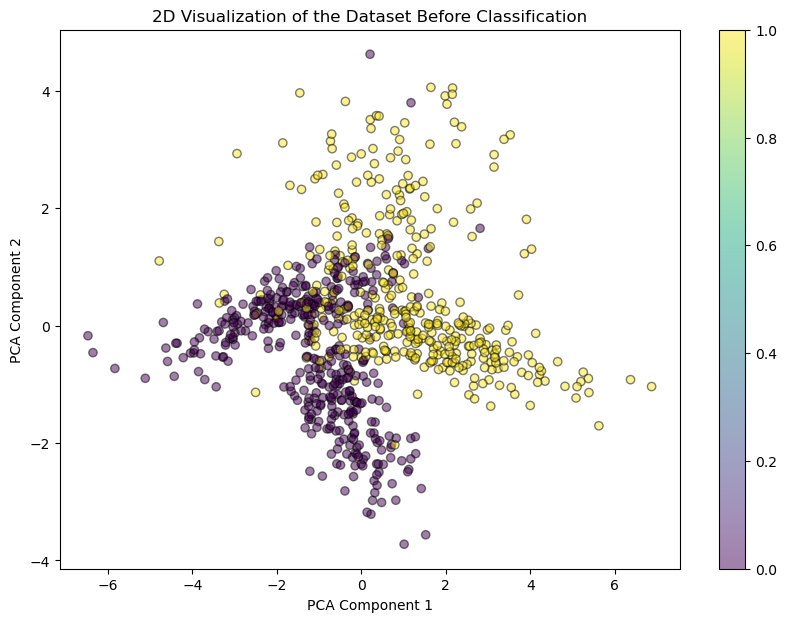

In [2]:
# PCA를 사용하여 데이터 축소 및 시각화
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_train_reduced = pca.fit_transform(X_train)


# 그림으로 그리는 부분
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
scatter = plt.scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', alpha=0.5, edgecolor='k')
plt.colorbar(scatter)
plt.title("2D Visualization of the Dataset Before Classification")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

c:\Users\HKIT\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\HKIT\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
c:\Users\HKIT\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


KeyboardInterrupt: 

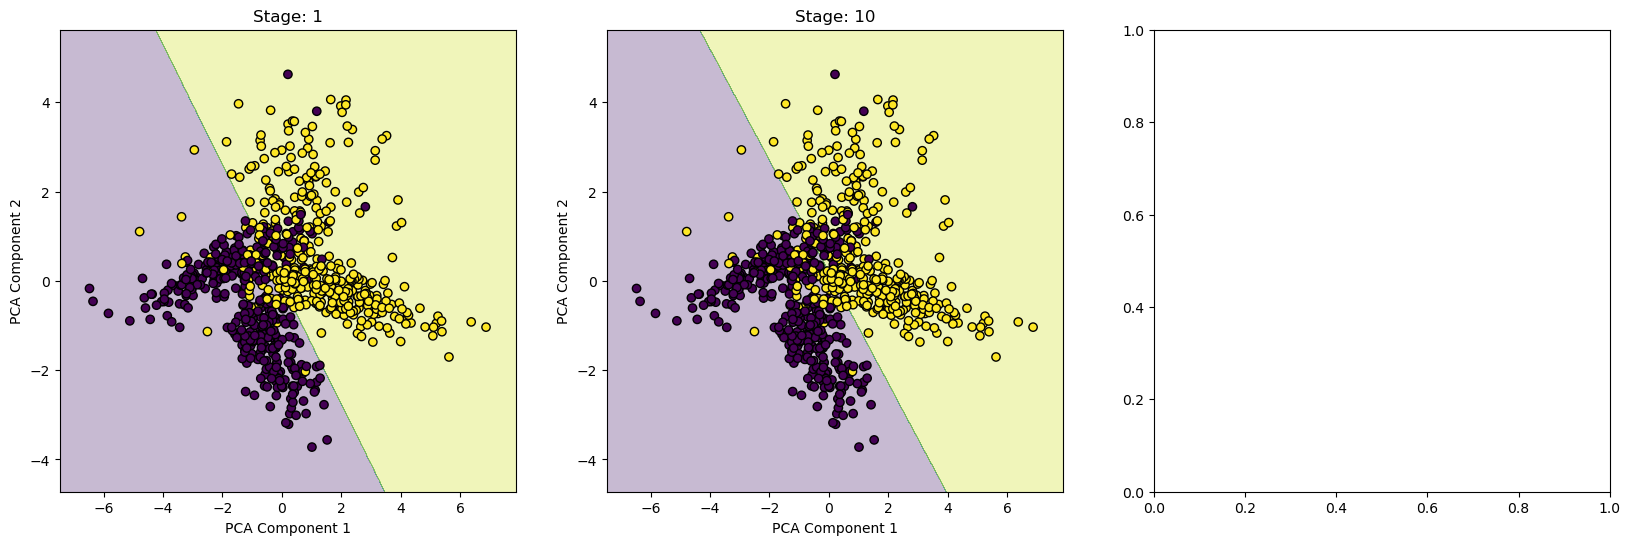

In [3]:
# 에이다부스트 모델 생성
# 기본 분류 모델: 서포트 벡터 머신
# kernel은 linear
base_estimator = SVC(probability=True,kernel='linear',random_state=42)
# AdaBoost분류기
# base_estimator, estimator의 갯수는 50 -> 약한 학습기 50개
# 학습률 1.0, random_state = 42
# 결정트리 구조가 순차적으로 50개 연결됨
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0, random_state=42)

import numpy as np
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
step = [1, 10, 50]  # 각 부스팅 단계

for idx, stage in enumerate(step):
    model.n_estimators = stage
    model.fit(X_train_reduced, y_train)

    # 결정 경계 시각화
    x_min, x_max = X_train_reduced[:, 0].min() - 1, X_train_reduced[:, 0].max() + 1
    y_min, y_max = X_train_reduced[:, 1].min() - 1, X_train_reduced[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    axes[idx].contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = axes[idx].scatter(X_train_reduced[:, 0], X_train_reduced[:, 1], c=y_train, cmap='viridis', edgecolor='k')
    axes[idx].set_title(f'Stage: {stage}')
    axes[idx].set_xlabel('PCA Component 1')
    axes[idx].set_ylabel('PCA Component 2')

plt.colorbar(scatter, ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
plt.show()

# 모델 학습
model.fit(X_train, y_train)

# 예측 및 평가
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


1. 약한 분류기를 여러개를 순차적으로 조합 (순차적 조합: 앞의 출력이 뒤의 모델 입력이 되는 구조)

2. 단슨한 분류기를 사용해서 비선형적인 특징으르 가지는 데이터 분류 기능

3. 잘못 예측한 데이터에 가중치를 부여 -> 잘못 예측한 데이터 분류에 집중